<a href="https://colab.research.google.com/github/Temitayo12/Default-Loan-Prediction/blob/main/Default_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
demo = pd.read_csv("https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv")
perf = pd.read_csv("https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv")
prevloans = pd.read_csv("https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv")

Data Exploration

In [ ]:
demo.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [ ]:
perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [ ]:
prevloans.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [ ]:
demo.shape

(4346, 9)

In [ ]:
perf.shape

(4368, 10)

In [ ]:
prevloans.shape

(18183, 12)

In [ ]:
# Exploring the Demographics data
demo.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [ ]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


Demo data shows missing values on 3 columns (employment_status_client, level_of_education,&  bank_branch_clients)
all other features has no missing values




In [ ]:
demo.duplicated().sum()

np.int64(12)

In [ ]:
demo['customerid'].duplicated().sum()

np.int64(12)

In [ ]:
demo.isnull().sum().sort_values(ascending=False)

,0
bank_branch_clients,4295
level_of_education_clients,3759
employment_status_clients,648
customerid,0
birthdate,0
latitude_gps,0
longitude_gps,0
bank_account_type,0
bank_name_clients,0


In [ ]:
# Checking for percentage of missing values
demo.isnull().sum().sort_values(ascending=False)/ len(demo)*100

,0
bank_branch_clients,98.826507
level_of_education_clients,86.493327
employment_status_clients,14.910262
customerid,0.000000
birthdate,0.000000
latitude_gps,0.000000
longitude_gps,0.000000
bank_account_type,0.000000
bank_name_clients,0.000000


In [ ]:
# Calculating Age
current_year = pd.to_datetime('now').year
demo['birthdate'] = pd.to_datetime(demo['birthdate'])
demo['age'] = current_year - demo['birthdate'].dt.year


In [ ]:
demo.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,age
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,52
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,39
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,38
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN,34
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN,43


In [ ]:
demo.bank_branch_clients.unique()

array([nan, 'LAGOS', 'LADIPO', 'AWOLOWO', 'OGBA', 'AJOSE ADEOGUN',
       'ABULE EGBA', 'OREGUN', 'ABEOKUTA', 'TRANS AMADI',
       'OBA AKRAN BERGER PAINT', 'APAPA', 'BOSSO ROAD, MINNA',
       'DUGBE, IBADAN', 'ALAUSA', 'OJUELEGBA', 'MUSHIN BRANCH', 'AKUTE',
       'OBA ADEBIMPE', 'STERLING BANK PLC 102, IJU ROAD, IFAKO BRANCH',
       'MEDICAL ROAD IKEJA', 'ADENIRAN OGUNSANYA', 'OBA AKRAN',
       '40,SAPELE ROAD ,OPPOSITE DUMAZ JUNCTION BENIN CITY EDO STATE.',
       'ACCESS BANK PLC, CHALLENGE ROUNDABOUT IBADAN, OYO STATE.',
       'ABULE EGBA U-TURN,BRANCH', 'OGUDU, OJOTA',
       'OBA AKRAN ROAD, IKEJA,', '47 LAGOS ROAD, IKORODU', 'OAU ILE IFE',
       'RING ROAD',
       'PLOT 999C DANMOLE STREET, ADEOLA ODEKU, VICTORIA ISLAND, LAGOS',
       'HERITAGE BANK, DUGBE, IBADAN', 'ADEOLA HOPEWELL',
       'WHARF ROAD, APAPA', 'ILUPEJU', 'AKOWONJO', 'DUGBE,IBADAN',
       'HEAD OFFICE', 'GBAGADA', 'LEKKI EPE', 'MAFOLUKU', 'AKURE BRANCH',
       '17, SANUSI FAFUNWA STREET, VICTORIA ISL

In [ ]:
demo.employment_status_clients.unique()

array([nan, 'Permanent', 'Student', 'Self-Employed', 'Unemployed',
       'Retired', 'Contract'], dtype=object)

In [ ]:
demo.level_of_education_clients.unique()

array([nan, 'Secondary', 'Graduate', 'Post-Graduate', 'Primary'],
      dtype=object)

In [ ]:
demo['age'].unique()

array([52, 39, 38, 34, 43, 47, 35, 33, 60, 31, 55, 37, 36, 42, 41, 40, 44,
       32, 49, 48, 46, 30, 51, 59, 50, 45, 58, 53, 56, 54, 57, 61, 63, 62,
       29, 64], dtype=int32)

In [ ]:
import warnings

In [ ]:
demo['employment_status_clients'].fillna('Unknown', inplace=True)

/tmp/ipython-input-2933824033.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  demo['employment_status_clients'].fillna('Unknown', inplace=True)


In [ ]:
demo['bank_branch_clients'].fillna('Unknown', inplace=True)

/tmp/ipython-input-3766860102.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  demo['bank_branch_clients'].fillna('Unknown', inplace=True)


In [ ]:
demo['level_of_education_clients'].fillna('Unknown', inplace=True)

/tmp/ipython-input-1077304218.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  demo['level_of_education_clients'].fillna('Unknown', inplace=True)


In [ ]:
#checking for filled missing values
demo.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,age
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,Unknown,Unknown,Unknown,52
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,Unknown,Permanent,Unknown,39
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,Unknown,Unknown,Unknown,38
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,Unknown,Permanent,Unknown,34
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,Unknown,Permanent,Unknown,43


In [ ]:
#checking for duplicates
demo.duplicated().sum()

np.int64(12)

In [ ]:
demo.drop_duplicates()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,age
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,Unknown,Unknown,Unknown,52
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,Unknown,Permanent,Unknown,39
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,Unknown,Unknown,Unknown,38
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,Unknown,Permanent,Unknown,34
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,Unknown,Permanent,Unknown,43
...,...,...,...,...,...,...,...,...,...,...
4341,8a858f155554552501555588ca2b3b40,1985-12-13,Other,3.236753,7.030168,Stanbic IBTC,Unknown,Permanent,Graduate,40
4342,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01,Savings,7.013750,4.875662,GT Bank,Unknown,Unknown,Unknown,43
4343,8a858f4f5b66de3a015b66fc83c61902,1989-09-26,Savings,6.295530,7.092508,GT Bank,Unknown,Permanent,Unknown,36
4344,8aaae7a74400b28201441c8b62514150,1985-09-06,Savings,3.354206,6.539070,GT Bank,HEAD OFFICE,Permanent,Primary,40


In [ ]:
demo.shape

(4346, 10)

In [ ]:
demo.drop_duplicates()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,age
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,Unknown,Unknown,Unknown,52
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,Unknown,Permanent,Unknown,39
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,Unknown,Unknown,Unknown,38
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,Unknown,Permanent,Unknown,34
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,Unknown,Permanent,Unknown,43
...,...,...,...,...,...,...,...,...,...,...
4341,8a858f155554552501555588ca2b3b40,1985-12-13,Other,3.236753,7.030168,Stanbic IBTC,Unknown,Permanent,Graduate,40
4342,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01,Savings,7.013750,4.875662,GT Bank,Unknown,Unknown,Unknown,43
4343,8a858f4f5b66de3a015b66fc83c61902,1989-09-26,Savings,6.295530,7.092508,GT Bank,Unknown,Permanent,Unknown,36
4344,8aaae7a74400b28201441c8b62514150,1985-09-06,Savings,3.354206,6.539070,GT Bank,HEAD OFFICE,Permanent,Primary,40


In [ ]:
df_demo = demo.drop_duplicates()

In [ ]:
df_demo.shape

(4334, 10)

In [ ]:
# Exploring performance dataset
perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [ ]:
# changing date colums to datetime
perf['approveddate'] = pd.to_datetime(perf['approveddate'])
perf['creationdate'] = pd.to_datetime(perf['creationdate'])

In [ ]:
# calculating the time of approval
perf['approval_time'] = (perf['approveddate'] - perf['creationdate']).dt.total_seconds()/3600

In [ ]:
perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,approval_time
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,1.002500
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,1.006389
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,1.001667
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,1.001667
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,1.001667


In [ ]:
perf.drop('referredby',axis=1, inplace=True)

In [ ]:
perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,approval_time
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1.002500
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,Good,1.006389
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Good,1.001667
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Good,1.001667
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Good,1.001667


In [ ]:
# Exploring previous Loan dataset
prevloans.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [ ]:
prevloans['approveddate'] = pd.to_datetime(prevloans['approveddate'])
prevloans['creationdate'] = pd.to_datetime(prevloans['creationdate'])
prevloans['closeddate'] = pd.to_datetime(prevloans['closeddate'])
prevloans['firstduedate'] = pd.to_datetime(prevloans['firstduedate'])
prevloans['firstrepaiddate'] = pd.to_datetime(prevloans['firstrepaiddate'])

In [ ]:
# Dropping referredby due to missing values
prevloans.drop('referredby', axis=1, inplace=True)

In [ ]:
prevloans.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,2016-09-14,2016-09-01 15:51:43
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,2017-05-30,2017-05-26 00:00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,2017-04-04,2017-04-26 22:03:47
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,2017-04-24,2017-04-24 00:48:43
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,2017-07-03,2017-07-14 21:08:35


In [ ]:
new_prevloans = prevloans.customerid.unique()

In [ ]:
new_prevloans

array(['8a2a81a74ce8c05d014cfb32a0da1049',
       '8a8588f35438fe12015444567666018e',
       '8a85890754145ace015429211b513e16', ...,
       '8a858f6459b6456d0159b69978f22bed',
       '8a858fad5ccb633e015ccbe337372ab3',
       '8a858f0656b7820c0156c92ca3ba436f'], dtype=object)

In [ ]:
# Calculate useful time-based features
prevloans['first_repayment_days'] = (prevloans['firstrepaiddate'] - prevloans['approveddate']).dt.days
prevloans['repayment_delay'] = (prevloans['firstrepaiddate'] - prevloans['firstduedate']).dt.days

In [ ]:
prevloans.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate,first_repayment_days,repayment_delay
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,2016-09-14,2016-09-01 15:51:43,16,-13
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,2017-05-30,2017-05-26 00:00:00,27,-4
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,2017-04-04,2017-04-26 22:03:47,52,22
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,2017-04-24,2017-04-24 00:48:43,14,0
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,2017-07-03,2017-07-14 21:08:35,27,11


In [ ]:
# Create 'loan_duration' column
prevloans['loan_duration'] = (prevloans['closeddate'] - prevloans['approveddate']).dt.days

In [ ]:
# Create the new 'time_to_approval' feature
prevloans['time_of_approval'] = (prevloans['approveddate'] - prevloans['creationdate']).dt.total_seconds() / 3600

In [ ]:
prevloans.shape

(18183, 15)

In [ ]:
prevloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customerid            18183 non-null  object        
 1   systemloanid          18183 non-null  int64         
 2   loannumber            18183 non-null  int64         
 3   approveddate          18183 non-null  datetime64[ns]
 4   creationdate          18183 non-null  datetime64[ns]
 5   loanamount            18183 non-null  float64       
 6   totaldue              18183 non-null  float64       
 7   termdays              18183 non-null  int64         
 8   closeddate            18183 non-null  datetime64[ns]
 9   firstduedate          18183 non-null  datetime64[ns]
 10  firstrepaiddate       18183 non-null  datetime64[ns]
 11  first_repayment_days  18183 non-null  int64         
 12  repayment_delay       18183 non-null  int64         
 13  loan_duration   

In [ ]:
prevloans.duplicated().sum()

np.int64(0)

In [ ]:
# Merging Demographics data and Preformance data

merged_data_1 = pd.merge(demo, perf, on='customerid', how='inner')
merged_data_1

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,age,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,approval_time
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,Unknown,Unknown,Unknown,52,301964962,2,2017-07-05 14:29:48,2017-07-05 13:29:42,10000.0,13000.0,30,Good,1.001667
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,Unknown,Permanent,Unknown,39,301972172,2,2017-07-10 21:21:46,2017-07-10 20:21:40,10000.0,13000.0,30,Bad,1.001667
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,Unknown,Unknown,Unknown,38,301976271,4,2017-07-13 15:40:27,2017-07-13 14:40:19,10000.0,13000.0,30,Good,1.002222
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,Unknown,Permanent,Unknown,34,301997763,2,2017-07-26 21:03:17,2017-07-26 20:03:09,10000.0,11500.0,15,Good,1.002222
4,8a858ea05a859123015a8892914d15b7,1990-07-21,Savings,3.365935,6.564823,Access Bank,Unknown,Permanent,Unknown,35,301992494,6,2017-07-23 21:44:43,2017-07-23 20:44:36,20000.0,24500.0,30,Good,1.001944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,8a858f735b437619015b437bf3d30bdc,1982-10-19,Savings,3.306874,6.669184,GT Bank,Unknown,Permanent,Unknown,43,301978422,3,2017-07-14 22:08:22,2017-07-14 21:07:13,10000.0,11500.0,15,Bad,1.019167
3273,8a858fc45c5f93be015c61e0e5e55e38,1986-02-16,Savings,3.353483,6.651007,GT Bank,Unknown,Unknown,Unknown,39,301981333,3,2017-07-17 08:52:06,2017-07-17 07:52:00,10000.0,11500.0,15,Good,1.001667
3274,8a85897353d85af80153d8a368020159,1983-06-07,Other,7.046360,5.499944,UBA,Unknown,Self-Employed,Unknown,42,301971930,11,2017-07-10 18:04:26,2017-07-10 17:04:21,40000.0,44000.0,30,Good,1.001389
3275,8a858f155554552501555588ca2b3b40,1985-12-13,Other,3.236753,7.030168,Stanbic IBTC,Unknown,Permanent,Graduate,40,301990956,7,2017-07-22 16:07:16,2017-07-22 15:07:02,20000.0,24500.0,30,Good,1.003889


In [ ]:
# checking for duplicates in merged data
merged_data_1.duplicated().sum()

np.int64(8)

In [ ]:
merged_data_1 =merged_data_1.drop_duplicates()

In [ ]:
merged_data_1.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,age,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,approval_time
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,Unknown,Unknown,Unknown,52,301964962,2,2017-07-05 14:29:48,2017-07-05 13:29:42,10000.0,13000.0,30,Good,1.001667
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,Unknown,Permanent,Unknown,39,301972172,2,2017-07-10 21:21:46,2017-07-10 20:21:40,10000.0,13000.0,30,Bad,1.001667
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,Unknown,Unknown,Unknown,38,301976271,4,2017-07-13 15:40:27,2017-07-13 14:40:19,10000.0,13000.0,30,Good,1.002222
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,Unknown,Permanent,Unknown,34,301997763,2,2017-07-26 21:03:17,2017-07-26 20:03:09,10000.0,11500.0,15,Good,1.002222
4,8a858ea05a859123015a8892914d15b7,1990-07-21,Savings,3.365935,6.564823,Access Bank,Unknown,Permanent,Unknown,35,301992494,6,2017-07-23 21:44:43,2017-07-23 20:44:36,20000.0,24500.0,30,Good,1.001944


In [ ]:
# checking for dropped duplicates
merged_data_1.duplicated().sum()

np.int64(0)

In [ ]:
# Calculate loan frequency per customer
loan_freq = merged_data_1.groupby('customerid')['loannumber'].count().reset_index(name='loan_frequency')  # Count loans per customer
merged_data_1 = merged_data_1.merge(loan_freq, on='customerid', how='left')  # Add loan frequency to dataset

In [ ]:
loan_freq

,customerid,loan_frequency
0,8a1088a0484472eb01484669e3ce4e0b,1
1,8a1a1e7e4f707f8b014f797718316cad,1
2,8a1a32fc49b632520149c3b8fdf85139,1
3,8a1eb5ba49a682300149c3c068b806c7,1
4,8a26bd845089f1d7015090b1d6f53bad,1
...,...,...
3264,8a858fff5a28d297015a338c644f5053,1
3265,8a858fff5a28d297015a33bc2e845305,1
3266,8a858fff5a36fe68015a37f8550a02a2,1
3267,8a858fff5a36fe68015a3b8dcb8a3843,1


In [ ]:
merged_data_1.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,age,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,approval_time,loan_frequency
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,Unknown,Unknown,Unknown,52,301964962,2,2017-07-05 14:29:48,2017-07-05 13:29:42,10000.0,13000.0,30,Good,1.001667,1
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,Unknown,Permanent,Unknown,39,301972172,2,2017-07-10 21:21:46,2017-07-10 20:21:40,10000.0,13000.0,30,Bad,1.001667,1
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,Unknown,Unknown,Unknown,38,301976271,4,2017-07-13 15:40:27,2017-07-13 14:40:19,10000.0,13000.0,30,Good,1.002222,1
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,Unknown,Permanent,Unknown,34,301997763,2,2017-07-26 21:03:17,2017-07-26 20:03:09,10000.0,11500.0,15,Good,1.002222,1
4,8a858ea05a859123015a8892914d15b7,1990-07-21,Savings,3.365935,6.564823,Access Bank,Unknown,Permanent,Unknown,35,301992494,6,2017-07-23 21:44:43,2017-07-23 20:44:36,20000.0,24500.0,30,Good,1.001944,1


In [ ]:
merged_data_1.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,age,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,approval_time,loan_frequency
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,Unknown,Unknown,Unknown,52,301964962,2,2017-07-05 14:29:48,2017-07-05 13:29:42,10000.0,13000.0,30,Good,1.001667,1
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,Unknown,Permanent,Unknown,39,301972172,2,2017-07-10 21:21:46,2017-07-10 20:21:40,10000.0,13000.0,30,Bad,1.001667,1
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,Unknown,Unknown,Unknown,38,301976271,4,2017-07-13 15:40:27,2017-07-13 14:40:19,10000.0,13000.0,30,Good,1.002222,1
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,Unknown,Permanent,Unknown,34,301997763,2,2017-07-26 21:03:17,2017-07-26 20:03:09,10000.0,11500.0,15,Good,1.002222,1
4,8a858ea05a859123015a8892914d15b7,1990-07-21,Savings,3.365935,6.564823,Access Bank,Unknown,Permanent,Unknown,35,301992494,6,2017-07-23 21:44:43,2017-07-23 20:44:36,20000.0,24500.0,30,Good,1.001944,1


In [ ]:
merged_data = merged_data_1

In [ ]:
merged_data.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,age,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,approval_time,loan_frequency
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,Unknown,Unknown,Unknown,52,301964962,2,2017-07-05 14:29:48,2017-07-05 13:29:42,10000.0,13000.0,30,Good,1.001667,1
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,Unknown,Permanent,Unknown,39,301972172,2,2017-07-10 21:21:46,2017-07-10 20:21:40,10000.0,13000.0,30,Bad,1.001667,1
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,Unknown,Unknown,Unknown,38,301976271,4,2017-07-13 15:40:27,2017-07-13 14:40:19,10000.0,13000.0,30,Good,1.002222,1
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,Unknown,Permanent,Unknown,34,301997763,2,2017-07-26 21:03:17,2017-07-26 20:03:09,10000.0,11500.0,15,Good,1.002222,1
4,8a858ea05a859123015a8892914d15b7,1990-07-21,Savings,3.365935,6.564823,Access Bank,Unknown,Permanent,Unknown,35,301992494,6,2017-07-23 21:44:43,2017-07-23 20:44:36,20000.0,24500.0,30,Good,1.001944,1


In [ ]:
merged_data.shape

(3269, 20)

In [ ]:
merged_data.duplicated().sum()

np.int64(0)

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  3269 non-null   object        
 1   birthdate                   3269 non-null   datetime64[ns]
 2   bank_account_type           3269 non-null   object        
 3   longitude_gps               3269 non-null   float64       
 4   latitude_gps                3269 non-null   float64       
 5   bank_name_clients           3269 non-null   object        
 6   bank_branch_clients         3269 non-null   object        
 7   employment_status_clients   3269 non-null   object        
 8   level_of_education_clients  3269 non-null   object        
 9   age                         3269 non-null   int32         
 10  systemloanid                3269 non-null   int64         
 11  loannumber                  3269 non-null   int64       

In [ ]:
# CHecking for statistics
merged_data.describe().T

,count,mean,min,25%,50%,75%,max,std
birthdate,3269,1984-08-03 17:28:23.640256960,1961-10-13 00:00:00,1980-11-30 00:00:00,1985-04-30 00:00:00,1989-01-16 00:00:00,1996-03-28 00:00:00,NaN
longitude_gps,3269.0,4.530975,-118.247009,3.354842,3.584222,6.439855,151.20929,7.925454
latitude_gps,3269.0,7.290383,-33.868818,6.473645,6.625681,7.426745,71.228069,3.269601
age,3269.0,40.909758,29.0,36.0,40.0,45.0,64.0,6.132223
systemloanid,3269.0,301980730.943714,301958485.0,301968853.0,301979426.0,301993368.0,302004050.0,13449.620639
loannumber,3269.0,5.18966,2.0,2.0,4.0,7.0,27.0,3.667166
approveddate,3269,2017-07-16 04:13:31.159069952,2017-07-01 01:35:26,2017-07-08 07:12:45,2017-07-15 17:12:12,2017-07-24 13:08:55,2017-07-30 22:55:51,NaN
creationdate,3269,2017-07-16 03:11:43.100336384,2017-07-01 00:35:20,2017-07-08 06:12:38,2017-07-15 16:12:04,2017-07-24 12:08:46,2017-07-30 21:55:43,NaN
loanamount,3269.0,17837.259101,10000.0,10000.0,10000.0,20000.0,60000.0,10742.89811
totaldue,3269.0,21287.068064,10000.0,13000.0,13000.0,24500.0,68100.0,11929.002681


In [ ]:
merged_data.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,age,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,approval_time,loan_frequency
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,Unknown,Unknown,Unknown,52,301964962,2,2017-07-05 14:29:48,2017-07-05 13:29:42,10000.0,13000.0,30,Good,1.001667,1
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,Unknown,Permanent,Unknown,39,301972172,2,2017-07-10 21:21:46,2017-07-10 20:21:40,10000.0,13000.0,30,Bad,1.001667,1
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,Unknown,Unknown,Unknown,38,301976271,4,2017-07-13 15:40:27,2017-07-13 14:40:19,10000.0,13000.0,30,Good,1.002222,1
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,Unknown,Permanent,Unknown,34,301997763,2,2017-07-26 21:03:17,2017-07-26 20:03:09,10000.0,11500.0,15,Good,1.002222,1
4,8a858ea05a859123015a8892914d15b7,1990-07-21,Savings,3.365935,6.564823,Access Bank,Unknown,Permanent,Unknown,35,301992494,6,2017-07-23 21:44:43,2017-07-23 20:44:36,20000.0,24500.0,30,Good,1.001944,1


Visualization¶

In [ ]:
merged_data.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients', 'age',
       'systemloanid', 'loannumber', 'approveddate', 'creationdate',
       'loanamount', 'totaldue', 'termdays', 'good_bad_flag', 'approval_time',
       'loan_frequency'],
      dtype='object')

In [ ]:
num_cols = merged_data.select_dtypes(include=np.number).columns.tolist()
cat_cols = merged_data.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
num_cols

['longitude_gps',
 'latitude_gps',
 'age',
 'systemloanid',
 'loannumber',
 'loanamount',
 'totaldue',
 'termdays',
 'approval_time',
 'loan_frequency']

In [ ]:
cat_cols

['customerid',
 'bank_account_type',
 'bank_name_clients',
 'bank_branch_clients',
 'employment_status_clients',
 'level_of_education_clients',
 'good_bad_flag']

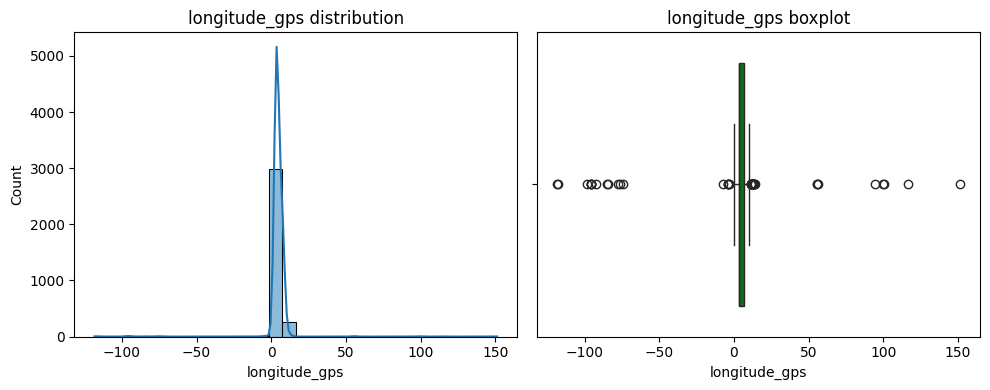

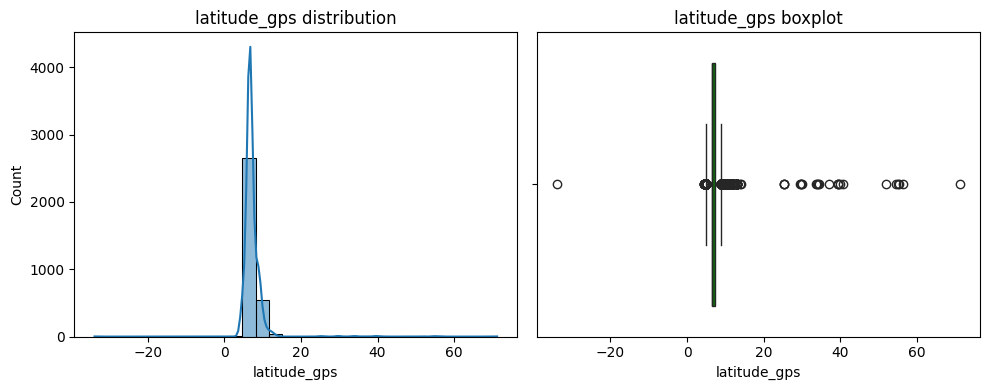

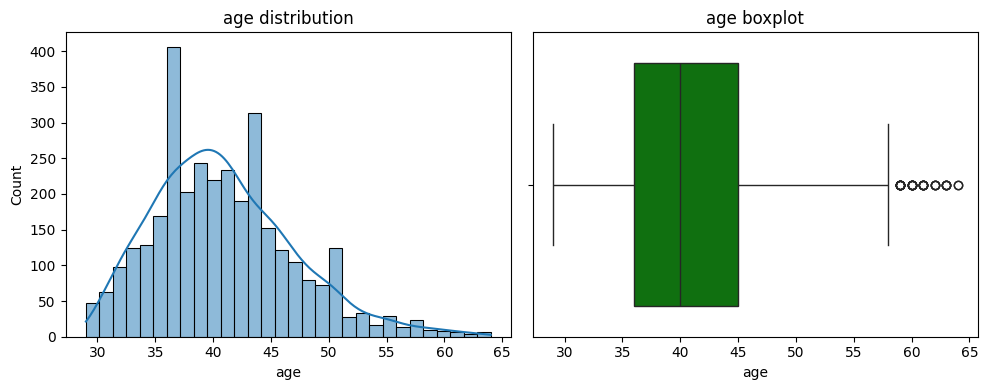

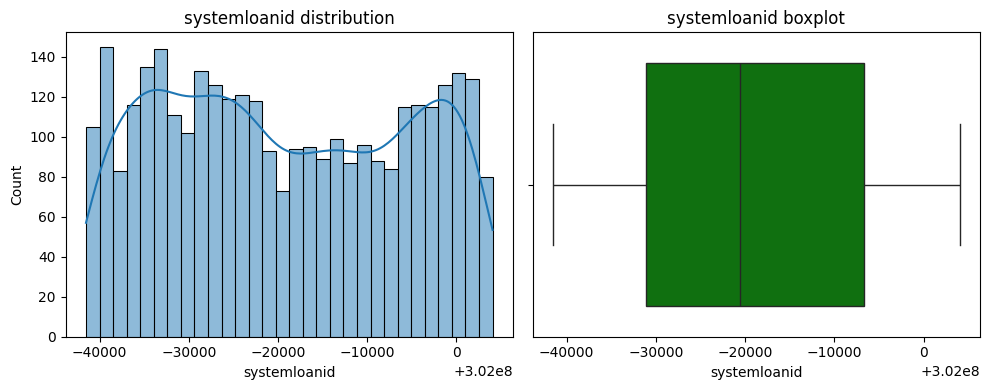

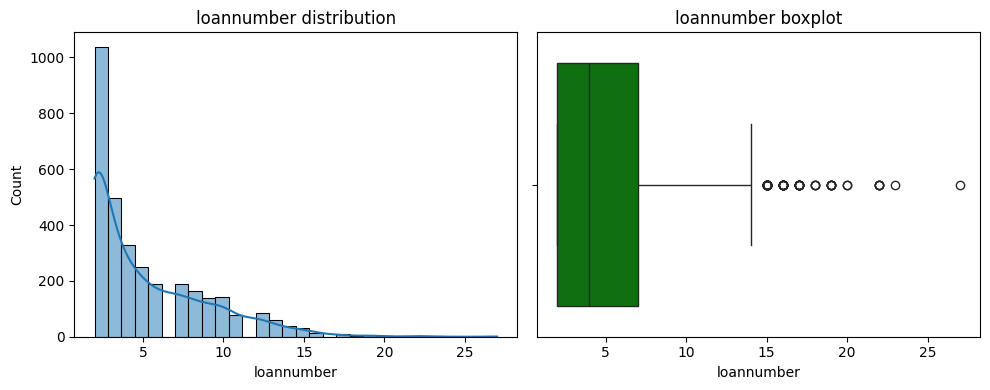

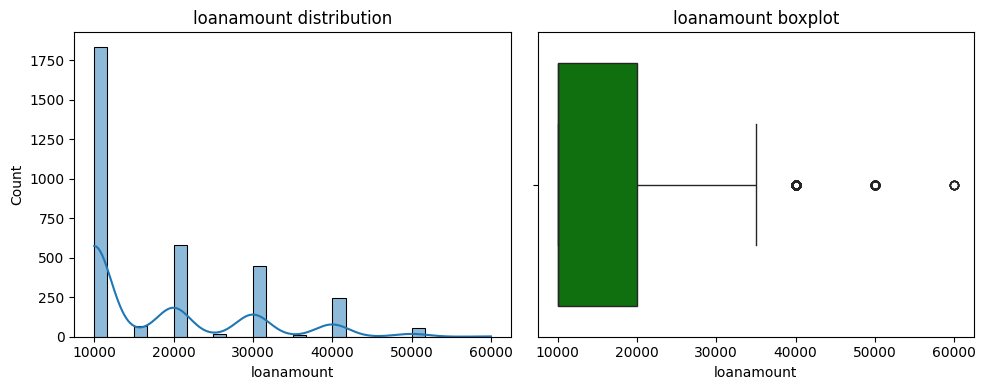

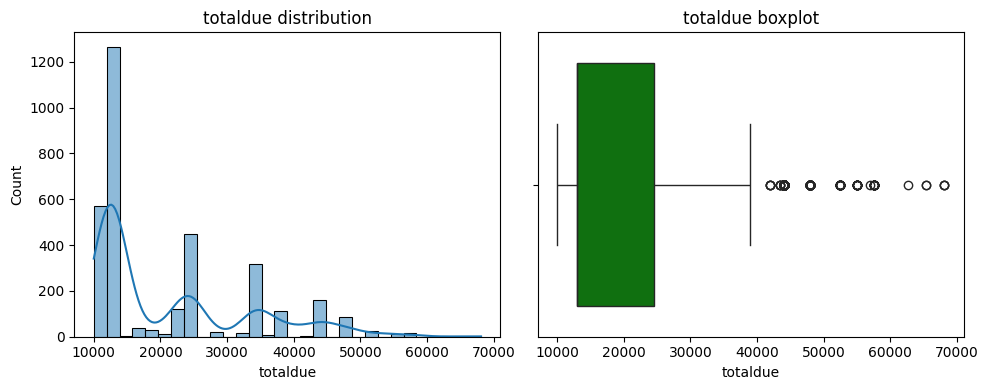

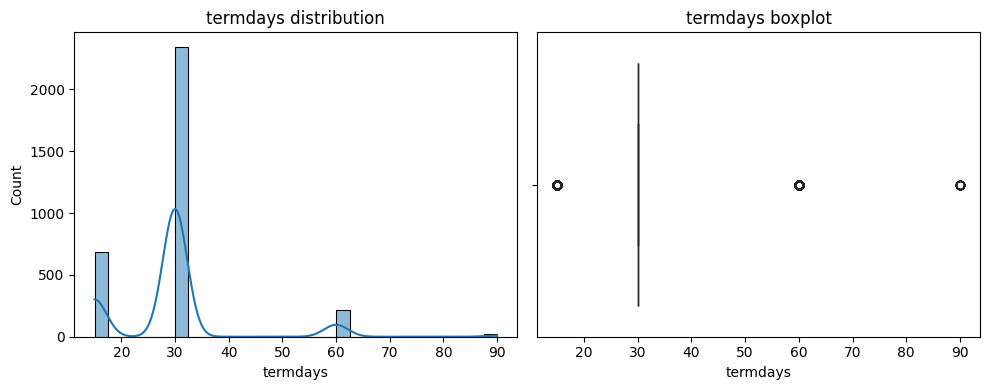

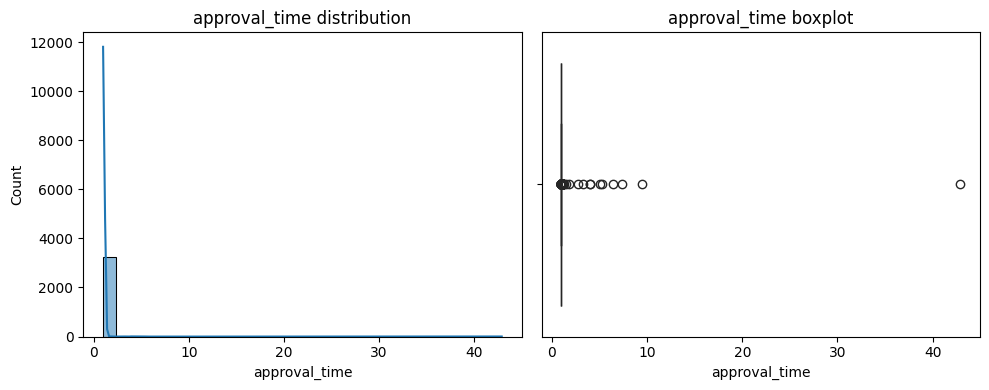

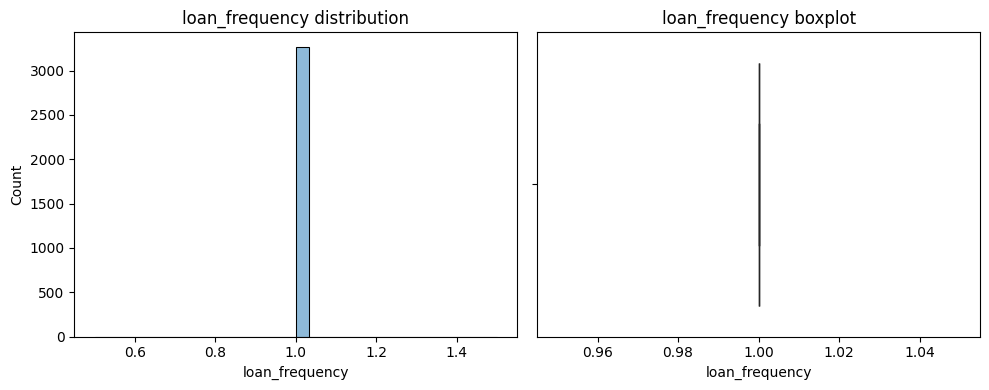

In [ ]:
# visualizing the numerical columns
for col in num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    sns.histplot(merged_data[col], kde=True, bins=30)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Count')


    plt.subplot(1,2,2)
    sns.boxplot(x = merged_data[col], color='green')
    plt.title(f'{col} boxplot')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

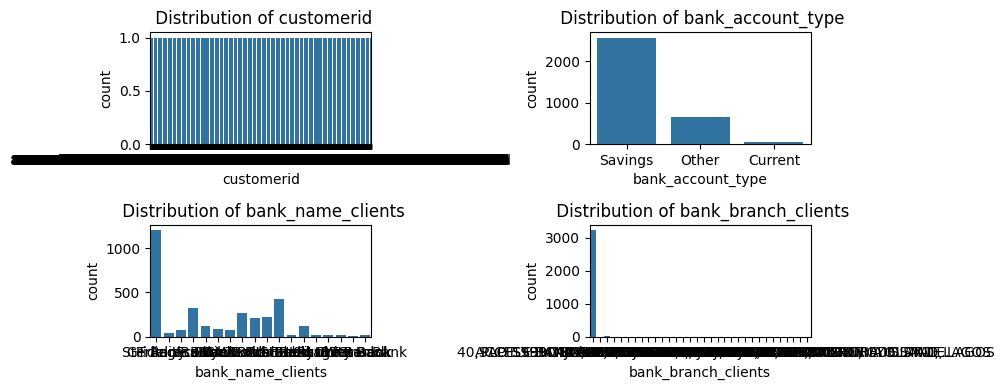

In [ ]:
# visualiazation for categorical columns
fig, axes = plt.subplots(2, 2, figsize=(10, 4))
axes_flat = axes.flatten()
for i, col in enumerate(cat_cols[:4]):
    ax = axes[i//2, i%2]
    sns.countplot(ax=axes_flat[i], data = merged_data, x=col)
    axes_flat[i].set_title(f' Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# checking my target feature
merged_data.good_bad_flag.value_counts() # shows that the target feature is not balanced

,count
good_bad_flag,
Good,2556
Bad,713


<Axes: xlabel='good_bad_flag'>

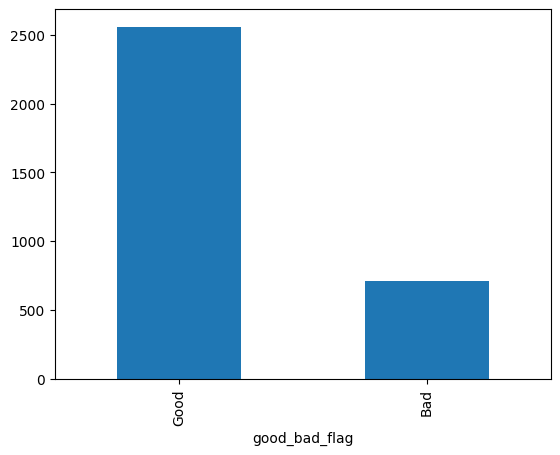

In [ ]:
# plotting a bar chart for my target feature
merged_data.good_bad_flag.value_counts().plot(kind='bar')

In [ ]:
merged_data.good_bad_flag = (merged_data.good_bad_flag == "Good").astype(int)

In [ ]:
merged_data.good_bad_flag.unique()

array([1, 0])

Data Preparation



In [ ]:
merged_data.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients', 'age',
       'systemloanid', 'loannumber', 'approveddate', 'creationdate',
       'loanamount', 'totaldue', 'termdays', 'good_bad_flag', 'approval_time',
       'loan_frequency'],
      dtype='object')

Data Preprocessing

In [ ]:
X = merged_data.drop(columns=['customerid', 'birthdate', 'good_bad_flag'])
y = merged_data['good_bad_flag']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# split to cat and num columns
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

Encoding Cat_cols

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
encoder= OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(X_train[cat_cols])

In [ ]:
# checking encoded columns
encoded_cols = list(encoder.get_feature_names_out(cat_cols))

In [ ]:
# fit it to the train and test cat cols
X_train[encoded_cols] = encoder.transform(X_train[cat_cols])
X_test[encoded_cols] = encoder.transform(X_test[cat_cols])

scaling num_cols

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
# combine the encoded cat cols with the scaled num cols
X_train = X_train[num_cols + encoded_cols]
X_test = X_test[num_cols + encoded_cols]

Training the model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
# training model
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# prediction of model
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [ ]:
# Evaluation of model
data = pd.DataFrame()
data['Actual'] = y_train
data['prediction'] = train_pred
data['correct'] = data['Actual'] == data['prediction']

In [ ]:
data.sample(10)

,Actual,prediction,correct
3006,1,1,True
22,1,1,True
2396,1,1,True
403,0,1,False
1506,1,1,True
2787,1,1,True
2676,0,1,False
1816,1,1,True
890,0,1,False
2246,1,1,True


In [ ]:
data.correct.value_counts()

,count
correct,
True,2051
False,564


Classification Metrics

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
train_acc = accuracy_score(train_pred, y_train)
test_acc = accuracy_score(test_pred, y_test)

In [ ]:
train_acc, test_acc

(0.7843212237093691, 0.7798165137614679)

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(train_pred, y_train)

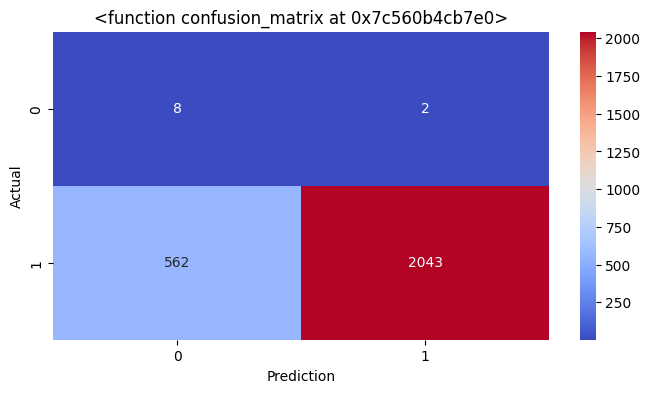

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title(confusion_matrix)

plt.show()

In [ ]:
y_train.value_counts()

,count
good_bad_flag,
1,2045
0,570


In [ ]:
train_pred

array([1, 1, 1, ..., 1, 1, 1])

Using Other models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# Import Metrics
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Desicion Tree": DecisionTreeClassifier(random_state=2),
    "Random Forest" : RandomForestClassifier(random_state=2),
    "XGBoost" : XGBClassifier(random_state=2),
    "LightGBM" : LGBMClassifier(random_state=2)
}

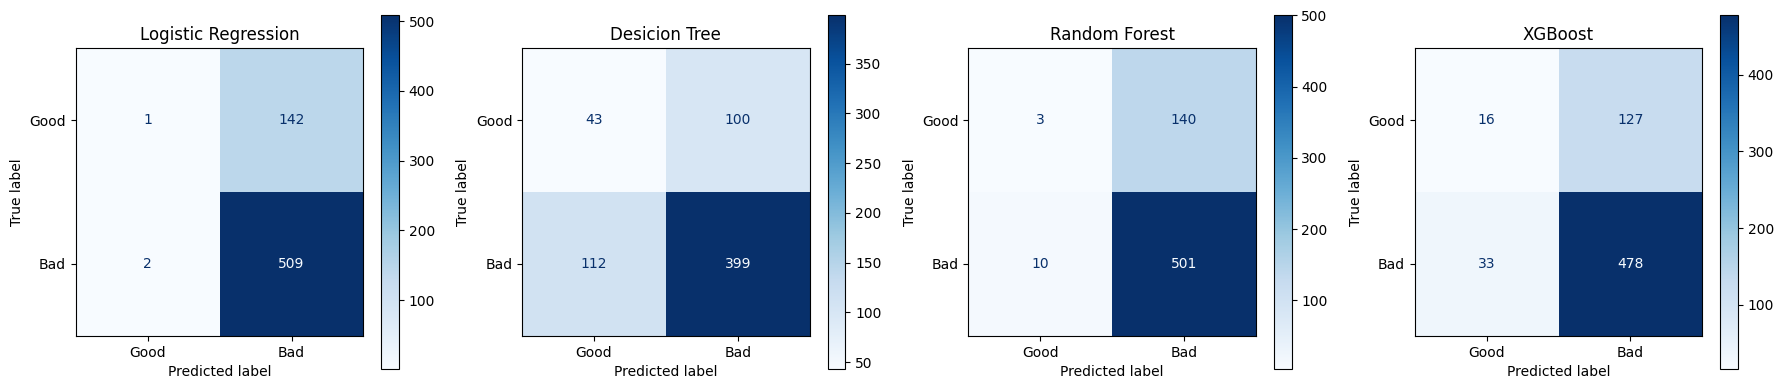


Classification Metrics
                 Logistic Regression  Desicion Tree  Random Forest  XGBoost
Train Accuracy                  0.78           1.00           1.00     0.98
Test Accuracy                   0.78           0.68           0.77     0.76
Precision Score                 0.78           0.80           0.78     0.79
Recall_Score                    1.00           0.78           0.98     0.94


In [ ]:
# Using for Loop
results = {}
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

for (name, model), ax in zip(models.items(), axes.flatten()):
    # training the model
    model.fit(X_train, y_train)

    # predicting the test and train score
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Evaluate the Predictions
    train_score = accuracy_score(y_train, train_pred)
    test_score = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)


    # storing the results
    results[name] = {
        "Train Accuracy" : train_score,
        "Test Accuracy" : test_score,
        "Precision Score" : precision,
        "Recall_Score" : recall
    }

    # Plot confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["Good", "Bad"])
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()


# print metrics
print('\nClassification Metrics')
metrics_df = pd.DataFrame(results)
print(metrics_df.round(2))

Balancing Target Column

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

,count
good_bad_flag,
1,2045
0,570


In [ ]:
smote = SMOTE(random_state=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# checking for balance
y_train_resampled.value_counts()

,count
good_bad_flag,
1,2045
0,2045


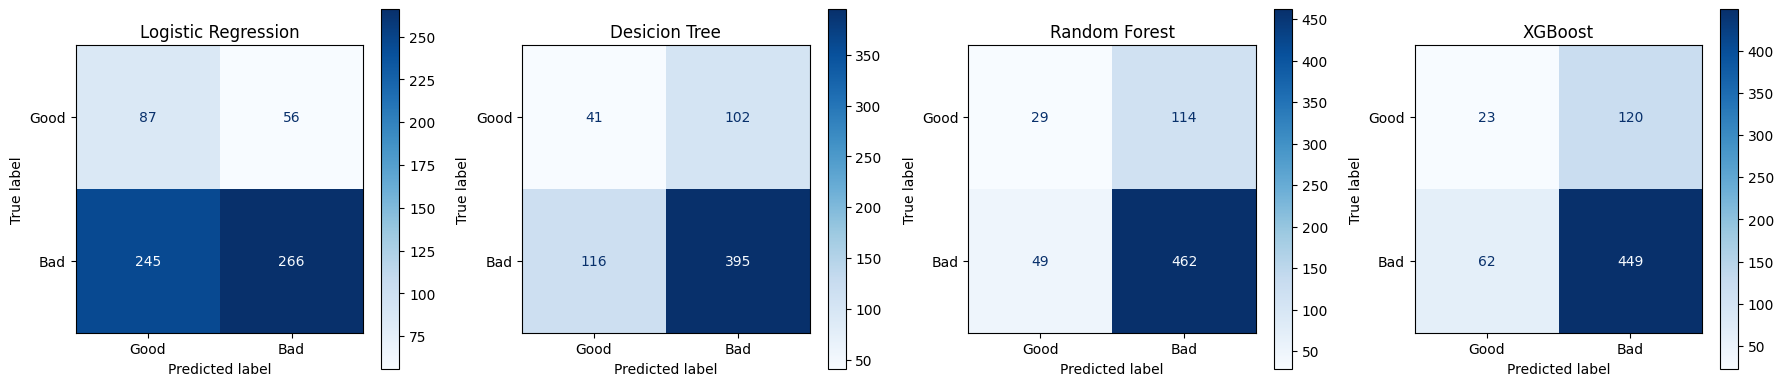


Classification Metrics
                 Logistic Regression  Desicion Tree  Random Forest  XGBoost
Train Accuracy                  0.63           1.00           1.00     0.98
Test Accuracy                   0.54           0.67           0.75     0.72
Precision Score                 0.83           0.79           0.80     0.79
Recall_Score                    0.52           0.77           0.90     0.88


In [ ]:
# Using for loop
results = {}
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

for (name, model), ax in zip(models.items(), axes.flatten()):
    # training the model
    model.fit(X_train_resampled, y_train_resampled)

    # predicting the test and train score
    train_pred = model.predict(X_train_resampled)
    test_pred = model.predict(X_test)

    # Evaluate the Predictions
    train_score = accuracy_score(train_pred, y_train_resampled)
    test_score = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)


    # storing the results
    results[name] = {
        "Train Accuracy" : train_score,
        "Test Accuracy" : test_score,
        "Precision Score" : precision,
        "Recall_Score" : recall
    }

    # Plot confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["Good", "Bad"])
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()


# print metrics
print('\nClassification Metrics')
metrics_df = pd.DataFrame(results)
print(metrics_df.round(2))